# Import the libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import Dataset, DataLoader
from torch.backends import cuda
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Read the Data

In [3]:
CVD_ds=pd.read_csv("E:/Unknown/CVD_cleaned.csv")

CVD_ds.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Data Understanding and Exploration

In [4]:
CVD_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
CVD_ds.describe(include=['object'])

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


In [6]:
CVD_ds.select_dtypes('object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

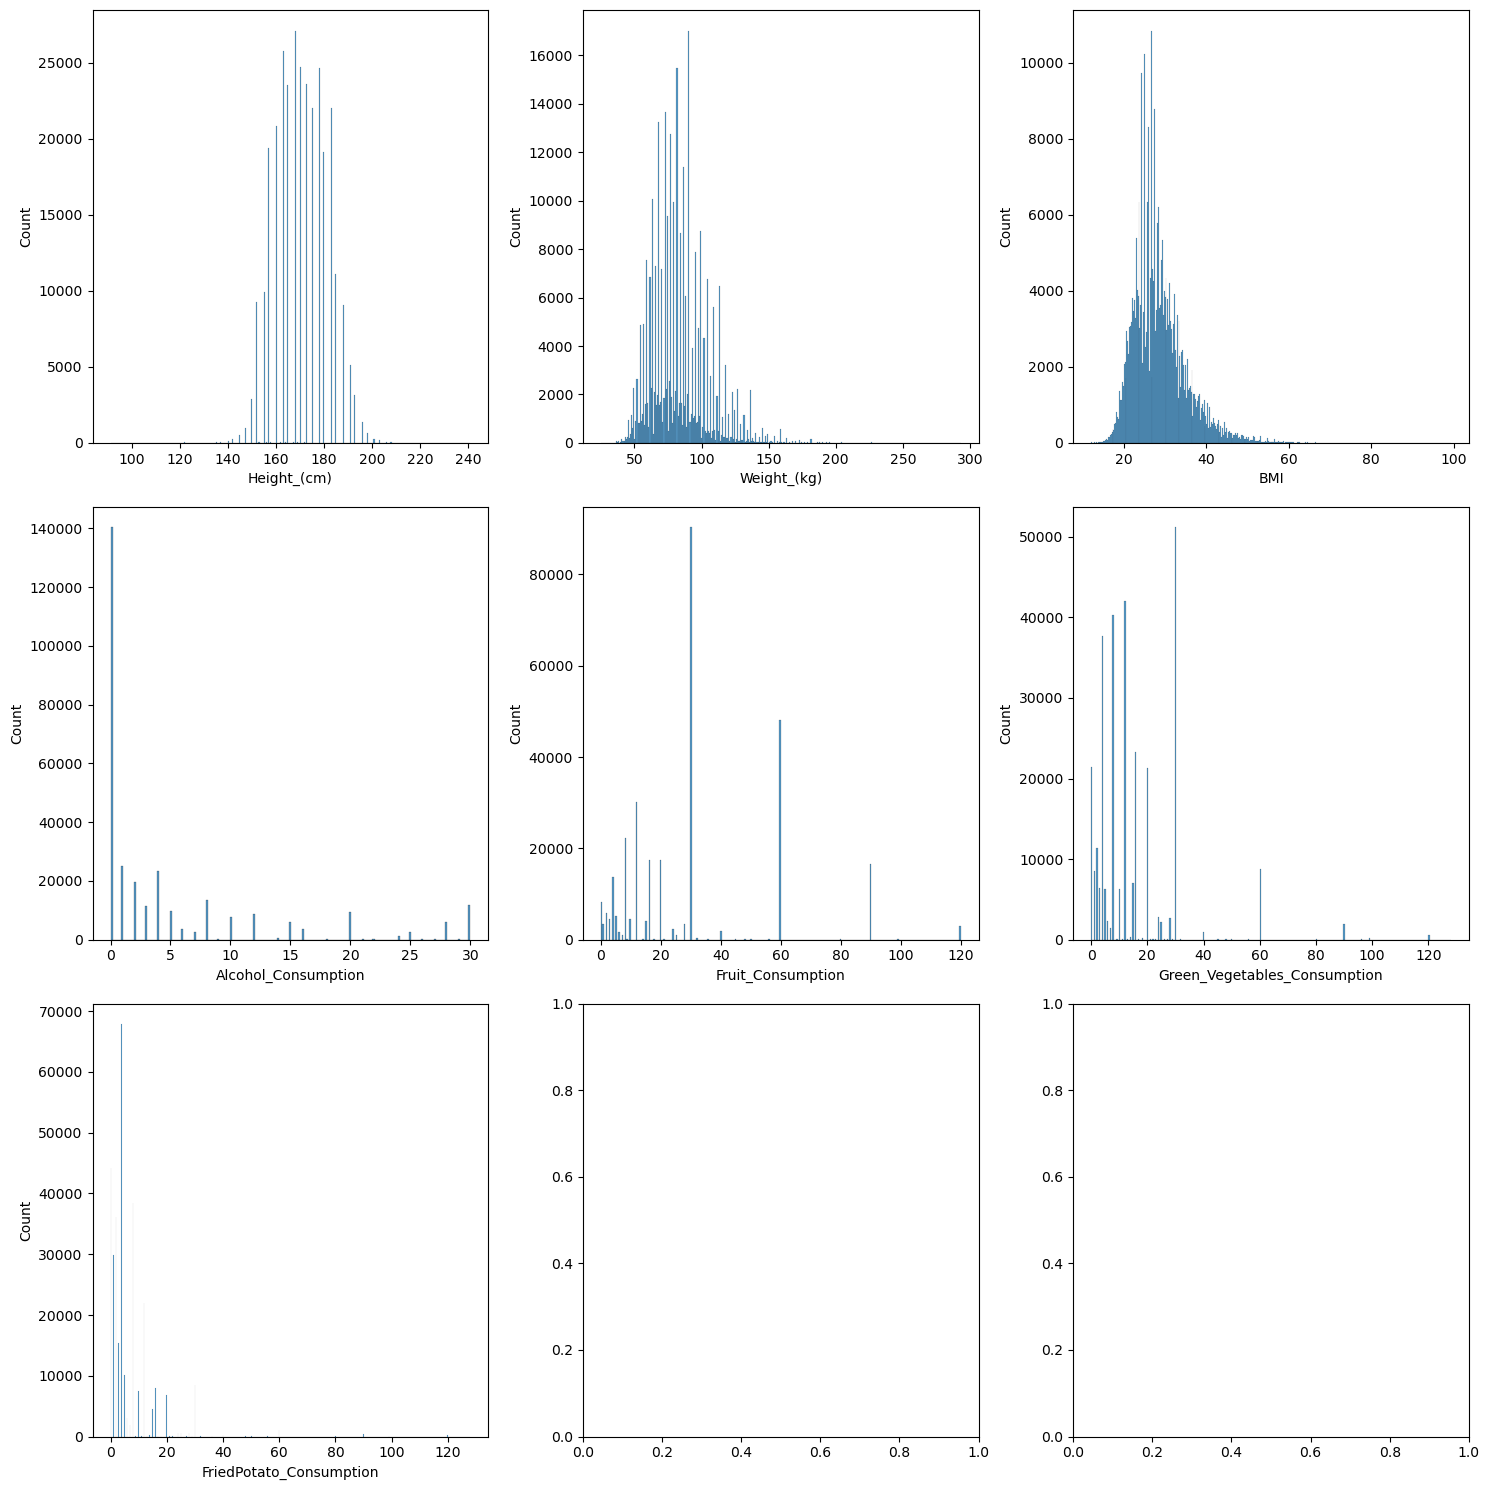

In [7]:
numerical_cols = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", 
                  "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(len(numerical_cols)):
    row = i // 3
    col = i % 3
    sns.histplot(CVD_ds[numerical_cols[i]], ax=axs[row, col])

plt.tight_layout()
plt.show()

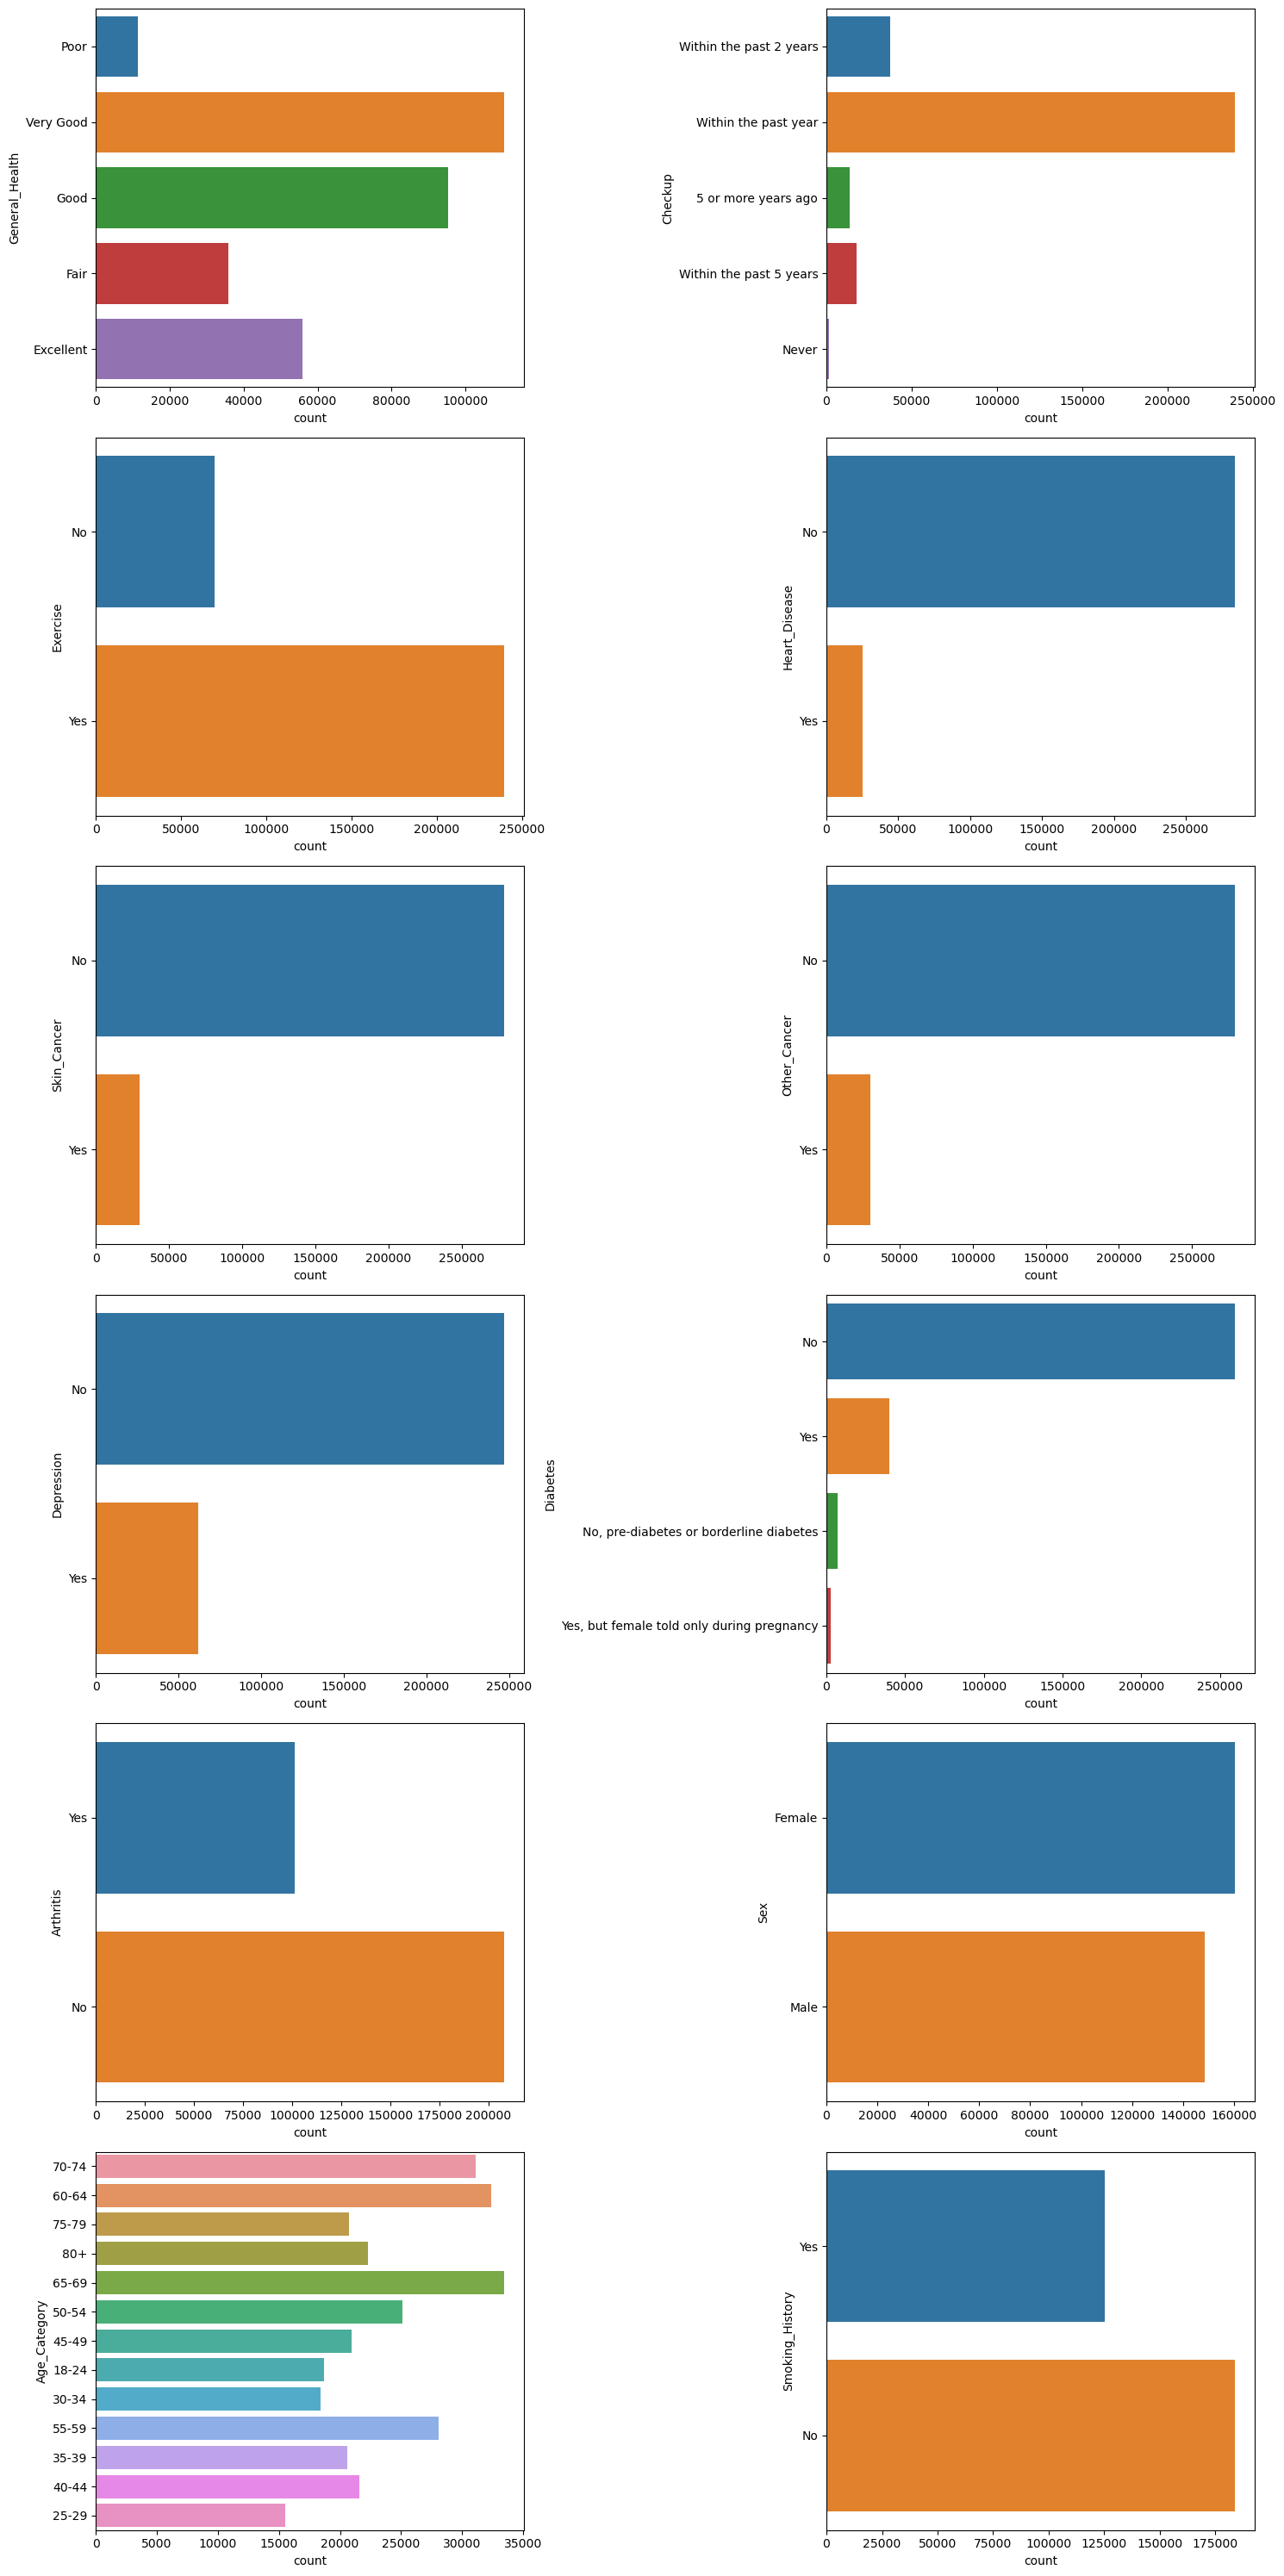

In [8]:
categorical_cols = ["General_Health", "Checkup", "Exercise", "Heart_Disease", "Skin_Cancer", 
                    "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"]

fig, axs = plt.subplots(6, 2, figsize=(15, 30))

for i in range(len(categorical_cols)):
    row = i // 2
    col = i % 2
    sns.countplot(y=CVD_ds[categorical_cols[i]], ax=axs[row, col])
    
plt.tight_layout()
plt.show()

# Data Cleaning and Preprocessing

In [9]:
missing_values = CVD_ds.isnull().sum()

missing_values

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [10]:
ordinal_cols = ['General_Health', 'Checkup', 'Age_Category']

for col in ordinal_cols:
    CVD_ds[col] = LabelEncoder().fit_transform(CVD_ds[col])

CVD_ds.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,No,No,No,No,No,No,Yes,Female,10,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,4,4,No,Yes,No,No,No,Yes,No,Female,10,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,4,4,Yes,No,No,No,No,Yes,No,Female,8,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,4,Yes,Yes,No,No,No,Yes,No,Male,11,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,2,4,No,No,No,No,No,No,No,Male,12,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [11]:
onehot_cols = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 
               'Diabetes', 'Arthritis', 'Sex', 'Smoking_History']

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(CVD_ds[onehot_cols])
onehot_encoded_data = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_cols))


CVD_ds = pd.concat([CVD_ds.drop(onehot_cols, axis=1), onehot_encoded_data], axis=1)

CVD_ds.head()

,General_Health,Checkup,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,...,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,3,2,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4,4,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4,4,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,4,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,4,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Model

In [12]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
device = get_default_device()

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [13]:
X_train = torch.tensor(CVD_ds.drop("Heart_Disease_Yes", axis=1).iloc[:270000,:].values,dtype=torch.float32)
y_train = torch.tensor(CVD_ds.iloc[:270000,CVD_ds.columns.tolist().index("Heart_Disease_Yes")].values,dtype=torch.float32)

X_test = torch.tensor(CVD_ds.drop("Heart_Disease_Yes", axis=1).iloc[270000:,:].values,dtype=torch.float32)
y_test = torch.tensor(CVD_ds.iloc[270000:,CVD_ds.columns.tolist().index("Heart_Disease_Yes")].values,dtype=torch.float32)

In [24]:
input_size = X_train.shape[1]

In [15]:
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

In [16]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [17]:
train_loader = DataLoader(train_dataset, 128, shuffle = True) 

In [18]:
test_loader =  DataLoader(test_dataset, 128)

In [39]:
train_dataset[1]

(tensor([  4.0000,   4.0000,  10.0000, 165.0000,  77.1100,  28.2900,   0.0000,
          30.0000,   0.0000,   4.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   1.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        device='cuda:0'),
 tensor(1., device='cuda:0'))

In [148]:
def accuracy(model, val_loader):
    model.eval()
    acc = 0
    count = 0
    for batch in val_loader:
        data, labels = batch
        outputs = model(data)
        outputs = outputs.squeeze(1)
        outputs = (outputs > 0.5).float()
        acc += torch.sum(outputs == labels)
        count += len(outputs)
    model.train()
    return acc / count

In [20]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    

In [56]:
def train(epoch, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    criterion = nn.BCELoss()
    for epoch in range(epoch):
        epoch_loss = 0
        epoch_accuracy = 0
        for batch in train_loader:
            data, labels = batch
            optimizer.zero_grad()
            output = model(data)
            output = output.squeeze(1)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss
        epoch_loss = epoch_loss / len(train_loader)
        epoch_accuracy = accuracy(model ,val_loader)
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, epoch_loss, epoch_accuracy))

In [153]:
model = to_device(LogisticRegressionModel(input_size), device)

In [154]:
train(5, 0.0001, model, train_loader, test_loader, torch.optim.SGD)

Epoch [0], val_loss: 0.4050, val_acc: 0.9173
Epoch [1], val_loss: 0.2666, val_acc: 0.9182
Epoch [2], val_loss: 0.2585, val_acc: 0.9182
Epoch [3], val_loss: 0.2542, val_acc: 0.9182
Epoch [4], val_loss: 0.2512, val_acc: 0.9182
